# Week 5 
## Prelab 2

**Due: Monday 5/6/19 11:59pm**

This prelab explores how to find motifs that are enriched in a set of sequences.

You have performed ChIP-seq for your favorite transcription factor and identified a set of binding sites ("peaks"). We would now like to scan the sites that are bound to identify specific motifs our TF might be binding to.

## 1. Loading the sequences 

In `/datasets/cs185s-sp19-public/week5/prelab2/` you will find:
* `peak_seqs.txt`: a list of sequences extracted from peaks where your TF is binding
* `bg_seqs.txt`: a list of sequences extracted from random background regions.

For both files, there are 100 sequences of length 75.

The cell below loads sequences from each into the lists `peak_seqs` and `bg_seqs` which you will be using in the next sections.

In [5]:
peak_seqs = []
bg_seqs = []

peak_seqs = [item.strip() for item in open("/datasets/cs185s-sp19-public/week5/prelab2/peak_seqs.txt", "r").readlines()]
bg_seqs = [item.strip() for item in open("/datasets/cs185s-sp19-public/week5/prelab2/bg_seqs.txt", "r").readlines()]

print("Loaded sequences:")
print("Peak seqs: %s"%len(peak_seqs))
print("Background seqs: %s"%len(bg_seqs))


Loaded sequences:
Peak seqs: 100
Background seqs: 100


## 2. Defining the PWMs

The cell below defines PWMs for three motifs we will use to test for enrichment and plots their sequence logos. Pay attention to the following variables which you'll be using below:

* `PWMList`: a list of three PWMs. Each PWM is a 2d numpy array with 4 rows and $n$ columns, using the same format we had for prelab 1 this week.
* `pwm_names`: a list of the names of the three PWMs (Sox2, Gata4, and Hnf4a)

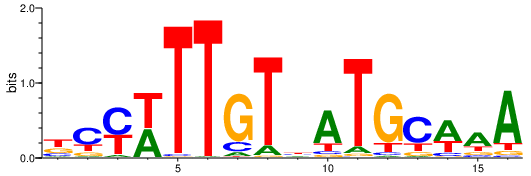

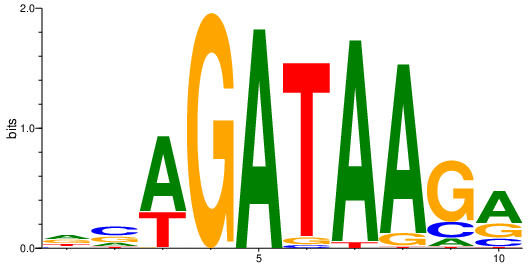

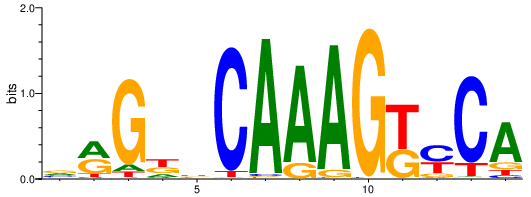

Example PWM


array([[-1.83361299, -2.15554108, -2.31903981,  0.81189105, -6.96289593,
        -4.15554107, -1.67749378, -1.26245629, -0.14271704,  1.44649493,
        -1.792971  , -2.71496849, -2.3779335 ,  1.16122531,  1.15084616,
         1.62956103],
       [-0.43933405,  1.17153032,  1.12456684, -4.37793349, -3.50346438,
        -6.96289593, -0.71496849, -6.96289593, -0.00869969, -1.67749378,
        -4.6409679 , -2.10491501,  1.34544303, -1.29047066, -1.40830715,
        -2.71496849],
       [ 0.22692855, -0.81314888, -3.962896  , -4.96289599, -4.6409679 ,
        -5.96289597,  1.57626281, -3.3779335 , -0.67749379, -1.91850188,
        -2.71496849,  1.58785078, -1.08025295, -2.87543316, -0.792971  ,
        -1.71496849],
       [ 0.85728296, -0.06807824,  0.63701684,  1.11391959,  1.94999333,
         1.97079465, -3.3779335 ,  1.79865523,  0.56066595, -0.51995251,
         1.81518112, -0.71496849, -0.33353938,  0.28503151, -0.27639548,
        -1.15554108]])

In [2]:
######### This cell defines the PWMs we'll be using below in PWMList ##########
import numpy as np
import seqlogo

# Sox2
pfm_1 = np.array([
[35.0,92.0,146.0,226.0],
[28.0,281.0,71.0,119.0],
[25.0,272.0,8.0,194.0],
[219.0,6.0,4.0,270.0],
[1.0,11.0,5.0,482.0],
[7.0,1.0,2.0,489.0],
[39.0,76.0,372.0,12.0],
[52.0,1.0,12.0,434.0],
[113.0,124.0,78.0,184.0],
[340.0,39.0,33.0,87.0],
[36.0,5.0,19.0,439.0],
[19.0,29.0,375.0,76.0],
[24.0,317.0,59.0,99.0],
[279.0,51.0,17.0,152.0],
[277.0,47.0,72.0,103.0],
[386.0,19.0,38.0,56.0]
]).transpose()

# Gata4
pfm_2 = np.array([
[184.0,64.0,156.0,96.0],
[94.0,215.0,142.0,49.0],
[332.0,4.0,8.0,156.0],
[2.0,0.0,498.0,0.0],
[490.0,2.0,4.0,4.0],
[4.0,11.0,20.0,465.0],
[481.0,2.0,2.0,15.0],
[459.0,1.0,35.0,5.0],
[47.0,91.0,349.0,13.0],
[285.0,71.0,128.0,16.0],
]).transpose()

# HNF4A
pfm_3 = np.array([
    [141.0,127.0,177.0,55.0],
[228.0,16.0,199.0,57.0],
[36.0,9.0,424.0,31.0],
[91.0,35.0,163.0,211.0],
[75.0,154.0,139.0,132.0],
[4.0,463.0,5.0,28.0],
[475.0,11.0,8.0,6.0],
[423.0,4.0,72.0,1.0],
[461.0,0.0,34.0,5.0],
[4.0,3.0,484.0,9.0],
[8.0,4.0,191.0,297.0],
[21.0,248.0,64.0,167.0],
[9.0,418.0,8.0,65.0],
[351.0,32.0,65.0,52.0]
]).transpose()

# Compute the pwms, which we'll use below
PWMList = []
pwm_names = ["SOX2","GATA4","HNF4A"]

# Plot the sequence logos
for pfm in [pfm_1, pfm_2, pfm_3]:
    seq_pfm = seqlogo.Pfm(pfm/np.sum(pfm, 0)[0]) # normalize to probabilities rather than counts
    seq_ppm = seqlogo.Ppm(seqlogo.pfm2ppm(seq_pfm))
    PWMList.append(np.array(seqlogo.ppm2pwm(seq_ppm)).transpose())
    seqlogo.seqlogo(seq_ppm, ic_scale = True, format = 'png', size = 'medium')

print("Example PWM")
display(PWMList[0])

## 3. Scoring sequences

To determine which motifs are enriched in our bound regions, we will want to be able to score each sequence to see if it matches a particular motif. In this section we'll write functions to score each sequence. Some notes to keep in mind:

* A sequence may have more than one "match" to a PWM. So we'll just keep track of the maximum score for each sequence.
* We'll need to check for matches on both DNA strands: if a motif matches either the sequence or its reverse complement, it should be considered a match.

**Question 1 (4 pts)**: Complete the functions below needed to determine the maximum PWM match score for each sequence:

* `ScoreSeq(pwm, seq)`: takes in a sequence of length $n$, and a pwm of size $4\times n$, and computes the PWM score for that sequence. You already wrote a function to do this in prelab 1. You can copy it here. There are no points for this since you already wrote this in prelab 1.
* `ReverseComplement(sequence)` (2 pts): should take in a string of nucleotides and output the reverse complement string
* `FindMaxScore(pwm, sequence)` (2 pts): should take in a string of nucleotides (of length longer than $n$), scan it (and its reverse complement) with the PWM, and output the maximum PWM match score for that sequence.

In [20]:
nucs = {"A": 0, "C": 1, "G": 2, "T": 3} # this might be helpful

# Input: pwm (2d array as defined above) and sequence (string to score with PWM)
# Output: score of the sequence based on the PWM
def ScoreSeq(pwm, sequence):
    nucs = {"A": 0, "C": 1, "G": 2, "T": 3}
    score = 0
    for i, nucleotide in enumerate(sequence):
        score += pwm[nucs[nucleotide],i]
    return score

# Return the reverse complement of a given sequence
def ReverseComplement(sequence):
    comp_dict = {"A": "T", "C": "G", "G": "C", "T": "A"}
    complement = ""
    for base in sequence:
        complement += comp_dict[base]
    revcomp = complement[::-1] #reverses order    
    return revcomp

# Scan a sequence with a pwm
# Compute the highest pwm score for a given sequence
# Be sure to check the forward and reverse strands!
def FindMaxScore(pwm, sequence):
    max_score = max(ScanSequence(pwm,sequence)+ScanSequence(pwm,ReverseComplement(sequence)))
    return max_score


def ScanSequence(pwm, sequence):
    n = pwm.shape[1]
    scores = [0]*(len(sequence)-n+1) # list of scores. scores[i] should give the score of the substring sequence[i:i+n]
    for i in range(len(scores)):
        scores[i] = ScoreSeq(pwm, sequence[i:i+n])
    return scores


# Check that it works. Should get an answer close to 16
FindMaxScore(PWMList[0], peak_seqs[0])

15.78518525594452

In [21]:
"""Check ReverseComplement"""
assert(ReverseComplement("ATG")=="CAT")
assert(ReverseComplement("CA")=="TG")
assert(ReverseComplement("AATCGACTG")=="CAGTCGATT")

In [23]:
"""Correct FindMaxScore"""
test_pwm = np.array([[1, 0, 0, 0], [0, -1, 1, 1], [2, -4, 0, 6], [1, -2, 1, 0]]).transpose()
test_seq = "GTAT"
assert(FindMaxScore(test_pwm, test_seq)==3)
assert(FindMaxScore(test_pwm, ReverseComplement(test_seq))==3)
test_seq = "GTATACT"
assert(FindMaxScore(test_pwm, test_seq)==9)
assert(FindMaxScore(test_pwm, ReverseComplement(test_seq))==9)

## 3. Setting the threshold

Now, we'd like to set thresholds for significant matches based on random sequences. 

**Question 2 (4 pts)**: Complete the functions below needed to determine appropriate thresholds for PWM matches:

* `ComputeNucFreqs(sequences)` (2 pts): computes the frequencies of A, C, G, and T in the input sequences
* `RandomSequence(n, freqs)` (2 pts): computes a random sequence of length $n$ based on background frequencies
* `GetThreshold(null_dist, pval)`: determine a score threshold for the desired p-value. You already wrote a function to do this in prelab 1. You can copy it here. There are no points for this since you already wrote this in prelab 1.

The code below will use your functions to compute score thresholds for each PWM. They will be stored in the list `pwm_thresholds`, with 3 values (one for each PWM in `PWMList`).

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


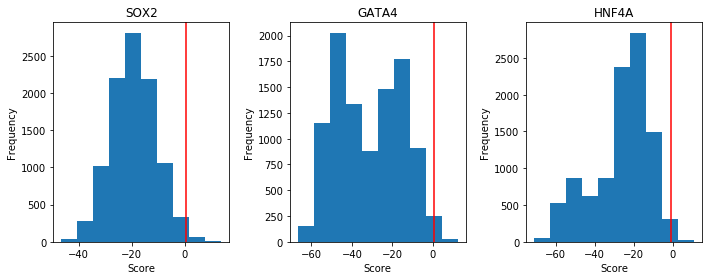

In [66]:
%pylab inline
def ComputeNucFreqs(sequences):
    freqs = [0,0,0,0] # compute frequency of A, C, G, T
    nucs = {"A": 0, "C": 1, "G": 2, "T": 3}
    total_bases = 0
    for seq in sequences:
        for base in seq:
            freqs[nucs[base]] += 1
            total_bases += 1
    freqs = np.array(freqs)/total_bases
    return freqs

# Inputs:
# . n: length of the sequence to generate
# . freqs = [freq_A, freq_C, freq_G, freq_T]
# Outputs: random sequence of length n with the specified allele frequencies
def RandomSequence(n, freqs):
    #seq = "A"*n # replace with your randomly generated sequence below
    seq = list(np.random.choice(["A","C","G","T"],size=n,p=freqs))
    seq = ''.join(seq)
    return seq

# Given a null distribution (list of values), find the threshold to achieve a desired p-value
# i.e.., pval % of null_dist should be above the threshold you return
def GetThreshold(null_dist, pval):
    thresh = 0 # set this  below to be the score threshold to obtain a p-value <0.01
    null_dist.sort(reverse=True)
    index = int(np.ceil(len(null_dist)*pval))-1 #-1 is since indexed off 0
    thresh = null_dist[index]
    return thresh

freqs = ComputeNucFreqs(peak_seqs+bg_seqs+[ReverseComplement(item) for item in peak_seqs] + [ReverseComplement(item) for item in bg_seqs])
numsim = 10000
pval = 0.01

pwm_thresholds = []
fig = plt.figure()
fig.set_size_inches((10, 4))
for i in range(3):
    null_scores = [ScoreSeq(PWMList[i], RandomSequence(PWMList[i].shape[1], freqs)) for j in range(numsim)]
    thresh = GetThreshold(null_scores, pval)
    ax = fig.add_subplot(1, 3, i+1)
    ax.hist(null_scores, bins=10);
    ax.axvline(x=thresh, color="red")
    ax.set_xlabel("Score")
    ax.set_ylabel("Frequency");
    ax.set_title(pwm_names[i])
    pwm_thresholds.append(thresh)
fig.tight_layout()

In [67]:
"""Test value of ComputeNucFreqs"""
seqs = ["A","T","C","G"]
f = ComputeNucFreqs(seqs)
for i in range(4): assert(f[i]==0.25)
seqs = ["AAA","CCC","GGG","TTT"]
f = ComputeNucFreqs(seqs)
for i in range(4): assert(f[i]==0.25)
seqs = ["AAA","CCC"]
f = ComputeNucFreqs(seqs)
for i in range(2): assert(f[i]==0.5)
for i in range(2,4): assert(f[i]==0.0)

In [68]:
"""Test value of RandomSequence"""
freqs = [1, 0, 0, 0]
assert(RandomSequence(5, freqs)=="AAAAA")
freqs = [0, 1, 0, 0]
assert(RandomSequence(3, freqs)=="CCC")
freqs = [0, 0, 1, 0]
assert(RandomSequence(6, freqs)=="GGGGGG")
freqs = [0, 0, 0, 1]
assert(RandomSequence(3, freqs)=="TTT")
freqs = [0.5, 0, 0.5, 0]
rseq = RandomSequence(10, freqs)
assert("C" not in rseq)
assert("T" not in rseq)
assert(len(rseq)==10)
assert("A" in rseq)
assert("G" in rseq)

## 4. Testing for motif enrichment

Finally, now that we have everything we need to score sequences for PWM matches, let's determine if motifs based on the three PWMs defined at the top of this notebook are enriched in our bound sequences vs. background sequences.

To test for enrichment, we'll use a Fisher Exact Test. For this, we need to construct a *contingency table* of the following form:

|   x| Bound | Not Bound |
|----|-----|-------|
| Match PWM | A| B|
| Don't match PWM |C |D |

where:
* A is the number of bound sequences matching the PWM
* C is the number of bound sequences not matching the PWM
* B is the number of background sequences matching the PWM
* D is the number of background sequences not matching the PWM.

In Python, we can then test whether bound sequences are enriched (or depleted) for matches to a specific PWM compared to background sequences (i.e., there is a non-random association between whether a sequence is bound and whether it matches a motif) using the following:
```python
import scipy.stats
table = [[A, B], [C, D]]
odds, pval = scipy.stats.fisher_exact(table)
```

The code below will use your functions to:
1. Count the number of bound sequences matching each motif.
2. Count the number of background sequences matching each motif.
3. Call a function `ComputeEnrichment` to test whether bound sequences are enriched for the motif.

**Question 3 (2 pts)**: Complete the function `ComputeEnrichment(peak_total, peak_bound, bg_total, bg_bound)`, which should return the p-value from your Fisher Exact Test.

In [75]:
import scipy.stats

def ComputeEnrichment(peak_total, peak_bound, bg_total, bg_bound):
    pval = -1
    table = [[peak_bound,bg_bound],[peak_total-peak_bound,bg_total-bg_bound]]
    odds, pval = scipy.stats.fisher_exact(table)
    return pval

for i in range(len(PWMList)):
    pwm = PWMList[i]
    thresh = pwm_thresholds[i]
    num_peak_pass = np.sum([int(FindMaxScore(pwm, seq)>thresh) for seq in peak_seqs])
    num_bg_pass = np.sum([int(FindMaxScore(pwm, seq)>thresh) for seq in bg_seqs])
    pval = ComputeEnrichment(len(peak_seqs), num_peak_pass, len(bg_seqs), num_bg_pass)
    print("PWM: %s, %s/%s peaks, %s/%s background; p-val: %s"%(pwm_names[i], num_peak_pass, len(peak_seqs), num_bg_pass, len(bg_seqs), pval))
    

PWM: SOX2, 99/100 peaks, 67/100 background; p-val: 2.0256782998973451e-10
PWM: GATA4, 76/100 peaks, 77/100 background; p-val: 1.0
PWM: HNF4A, 80/100 peaks, 80/100 background; p-val: 1.0


In [76]:
"""Check ComputeContingencyTable"""
assert(ComputeEnrichment(100, 0, 100, 0)==1.0)
assert(int(np.log10(ComputeEnrichment(100, 50, 100, 0)))==-18)
assert(round(ComputeEnrichment(100, 5, 100, 0), 2)==0.06)

Hopefully you will find that a familiar motif is enriched (Sox2).

You will also find that there are many matches to all of the PWMs also in the background sequences! We were probably a little lenient in setting our thresholds (using p<0.01), which does not account for all the tests we performed. Even so, we'd still find perfect matches just by chance in background sequences. This is the topic of the last section of this week's lab.